In [1]:
import pandas as pd

from data import search_documents

In [2]:
db = 'transcripts'
col = 'sentiment_textblob'

In [3]:
res = search_documents(db, col)

In [4]:
(res[0]['date'])

'Aired July 25, 2022 - 21:00 \xa0 ET'

In [7]:
df = pd.DataFrame(res)

In [8]:
df['date'] = [item[6:] for item in df['date']]

In [9]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Sayer Kanakriyeh\AppData\Roaming\Python\Python39\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [10]:
df['network'] = "cnn"

In [11]:
df.drop(["_id", "transcript", 'sentence_breakdown'], axis=1, inplace=True)
df.set_index('date', inplace=True)

In [13]:
df

,title,polarity,subjectivity,percent_over_zero,network
date,,,,,
2022-07-25 21:00:00,Anderson Cooper 360 Degrees,0.147686,0.469766,0.408233,cnn
2022-07-25 20:00:00,Anderson Cooper 360 Degrees,0.101798,0.469625,0.358871,cnn
2022-07-22 20:00:00,Anderson Cooper 360 Degrees,0.040762,0.401014,0.320574,cnn
2022-07-21 20:00:00,Anderson Cooper 360 Degrees,0.000000,0.000000,0.000000,cnn
2022-07-20 20:00:00,Anderson Cooper 360 Degrees,0.048333,0.446224,0.322660,cnn
...,...,...,...,...,...
2022-04-11 20:00:00,Anderson Cooper 360 Degrees,0.063362,0.389373,0.357576,cnn
2022-04-08 20:00:00,Anderson Cooper 360 Degrees,-0.005341,0.432614,0.287879,cnn
2022-04-07 20:00:00,Anderson Cooper 360 Degrees,0.065402,0.414941,0.345269,cnn


<AxesSubplot:xlabel='date'>

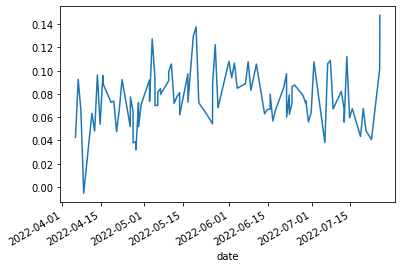

In [26]:
df['polarity'][df['polarity'] != 0].plot()

<AxesSubplot:xlabel='date'>

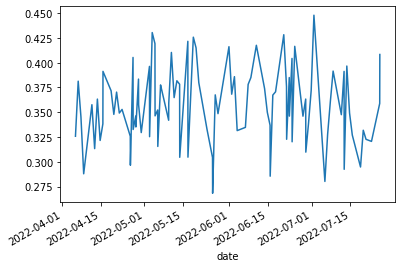

In [29]:
# This references a feature created from the sentence-by-sentence breakdown and sentiment analysis
# It's the percentage of that days broadcast's sentences that got rated > 0
df['percent_over_zero'][df['percent_over_zero'] != 0].plot()

<AxesSubplot:xlabel='date'>

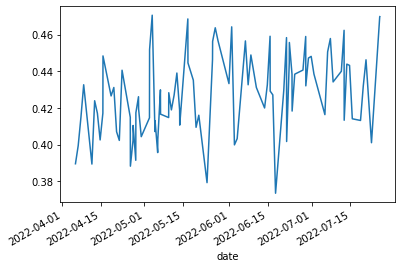

In [28]:
df['subjectivity'][df['subjectivity'] != 0].plot()

In [27]:
df['polarity'][df['polarity'] != 0]

date
2022-07-25 21:00:00    0.147686
2022-07-25 20:00:00    0.101798
2022-07-22 20:00:00    0.040762
2022-07-20 20:00:00    0.048333
2022-07-19 20:00:00    0.067495
                         ...   
2022-04-11 20:00:00    0.063362
2022-04-08 20:00:00   -0.005341
2022-04-07 20:00:00    0.065402
2022-04-06 20:00:00    0.092483
2022-04-05 20:00:00    0.042653
Name: polarity, Length: 94, dtype: float64

In [14]:
# import os
# import glob
# import json

# filepath = "data/acd"
# json_files = glob.glob(os.path.join(filepath, '*.json'))
# json_files = [os.path.normpath(item) for item in json_files]
# json_files = [item.replace("\\", "/") for item in json_files]